           V1          V2          V3          V4          V5          V6  \
0 -149.456468 -405.308546 -172.825394 -240.709119 -134.607269  110.802685   
1 -147.337357 -399.984200 -168.418445 -236.081080 -136.245803  103.824203   
2 -144.484352 -392.844438 -162.353208 -229.768232 -138.691237   94.063908   
3 -139.581587 -379.758003 -155.714514 -221.270013 -136.032979   87.750053   
4 -134.817180 -366.876922 -150.022501 -213.483202 -132.073072   83.713058   

          V7         V8          V9         V10  ...         V41        V42  \
0  17.347416  47.390445 -258.805158  152.932933  ... -129.343561 -83.326353   
1  11.757034  42.714638 -256.775665  159.535557  ... -131.482142 -81.684375   
2   3.869821  36.149228 -254.154025  169.016881  ... -134.629517 -79.442659   
3   0.652892  32.610937 -246.476743  168.345637  ... -132.354699 -76.481065   
4  -0.399032  30.726439 -238.379598  164.289211  ... -128.602303 -73.781779   

          V43         V44        V45         V46         V47  

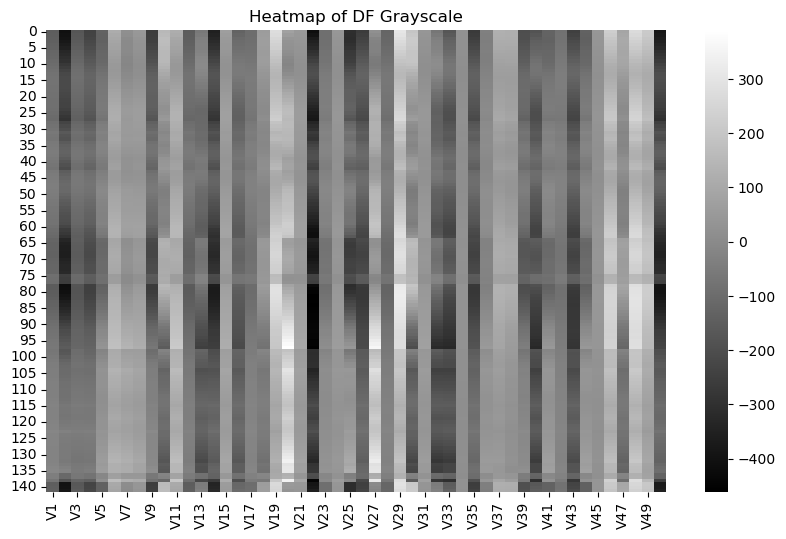

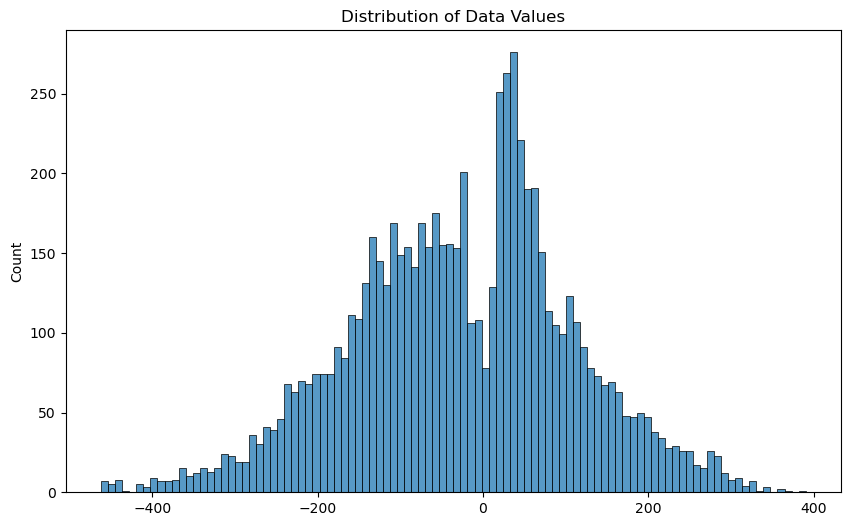

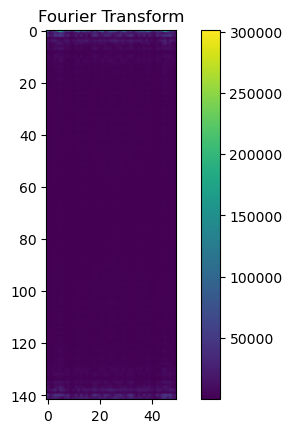

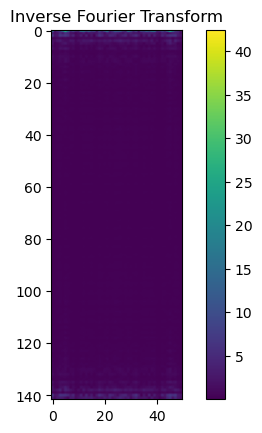

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft2, ifft2

#
df = pd.read_csv("./midterm_data/data_midterm_problem4.csv")
print(df.head())
print(df.shape)
print("Number of missing values: ", df.isnull().sum().sum())

## Exploratory data analysis
plt.figure(figsize=(10, 6))  
sns.heatmap(df, cmap='gray', cbar=True)  

plt.title('Heatmap of DF Grayscale')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df.values.flatten(), bins=100)
plt.title('Distribution of Data Values')
plt.show()

## with hail mary fourier transform

# 
da = df.to_numpy()

fft_result = fft2(da)
ifft_result = ifft2(da)
#
plt.imshow(np.abs(fft_result)) 
plt.title('Fourier Transform')
plt.colorbar()
plt.show()

plt.imshow(np.abs(ifft_result))
plt.title('Inverse Fourier Transform')
plt.colorbar()
plt.show()


The fourier transform and inverse fourier transform do not show much variation aside from near the 0 frequency. it is unclear to me whether I am making a mistake in my plotting or calculation, but I will take the ffts at face value and move on with the assumption that the image has not been hidden this way. Since the fourier transform and inverse fourier transform did not reveal anything, we will try PCA as a means of identifying patterns within the dataset.

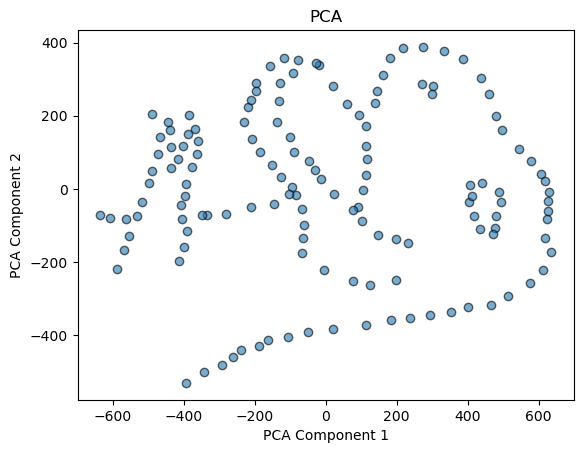

In [3]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(da)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA')
plt.show()

Lo and behold, PCA of the numpy array reveals a dinosaur laying on its back!